In [1]:
import os, sys, imp

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import datasets as D

import plot_lib as pl
imp.reload(pl)

import tensorflow as tf
import keras

/var/folders/b9/jjp98g8j2mbcn65j0fgl0dzw0000gp/T/ipykernel_68524/3185688312.py:1: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import os, sys, imp


In [2]:
# Set style (needs to be in a new cell)
pl.set_default()

### Generate 2D datapoints

In [3]:
X = tf.random.normal([1000, 2])
Xn = X.numpy()

In [4]:
colors = Xn[:, 0] # colors
OI = tf.constant([[0, 0], [0, 0], [1, 0], [0, 1]], dtype=float) # base vectors
OIn = OI.numpy()

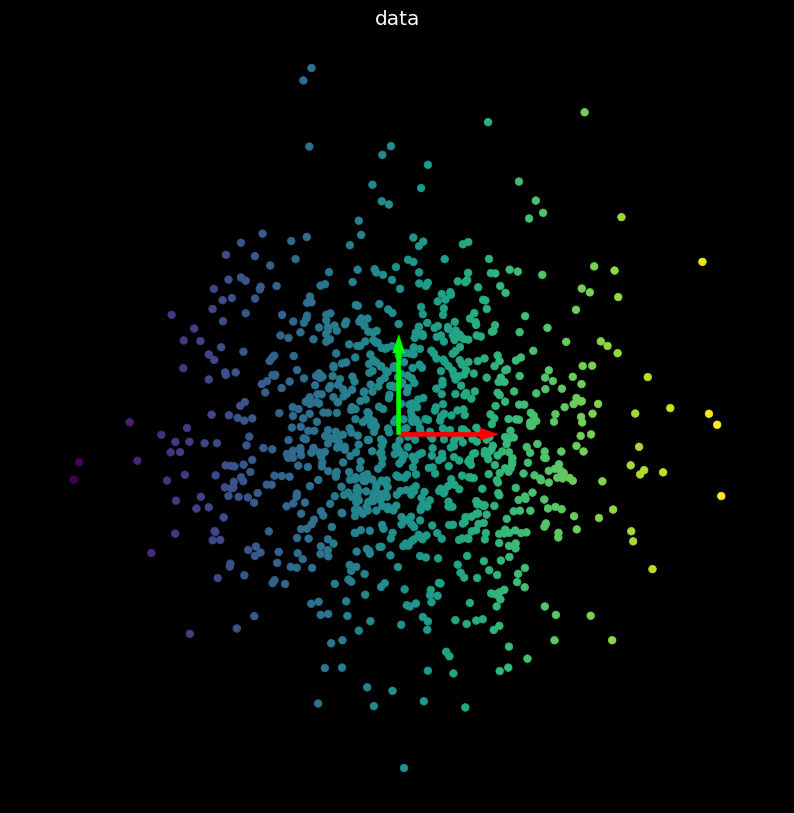

In [5]:
pl.show_scatterplot(X.numpy(), colors, title='data')
pl.plot_bases(OI.numpy())

### Linear Transformation

In [6]:
# Define transformation matrix and bias
W = tf.random.normal([2, 2])
b = tf.zeros([2])

In [7]:
# Transform!
# Y = X @ W + b
# new_OI = OI @ W + b

Y = tf.matmul(X, W) + b
new_OI = tf.matmul(OI, W) + b

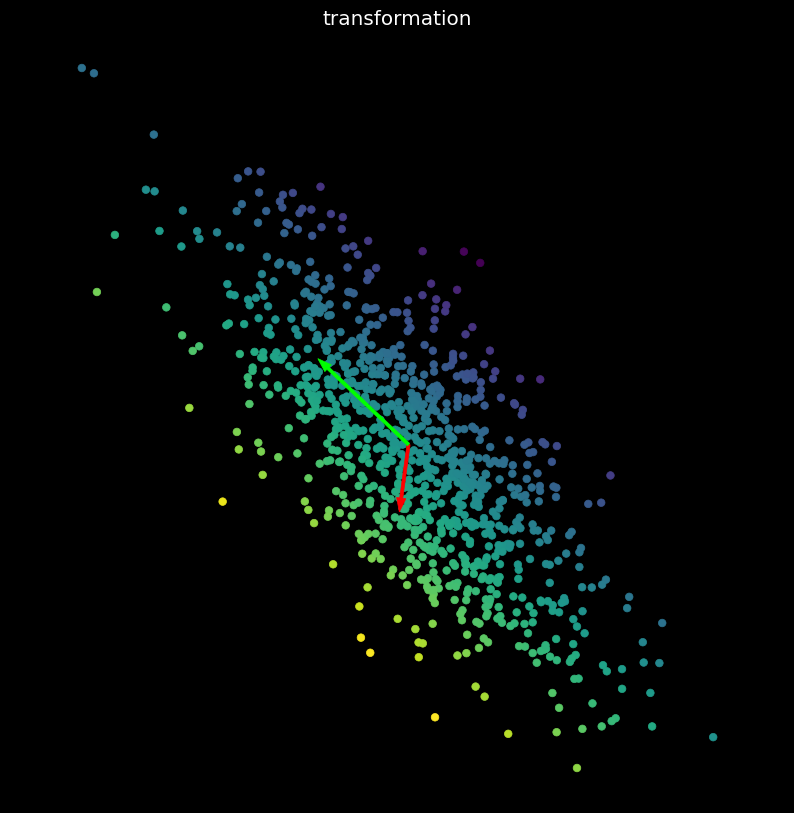

In [8]:
pl.show_scatterplot(Y.numpy(), colors, title='transformation')
pl.plot_bases(new_OI.numpy())

### Linear Transformation with Keras Linear Layer

In [22]:
hidden_layer = keras.layers.Dense(units=2, activation='tanh')

In [26]:
hidden_layer.build(X.shape)

/opt/homebrew/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [27]:
hidden_layer.set_weights([W.numpy(), b.numpy()])

In [28]:
Y = hidden_layer(X)
new_OI = hidden_layer(OI)

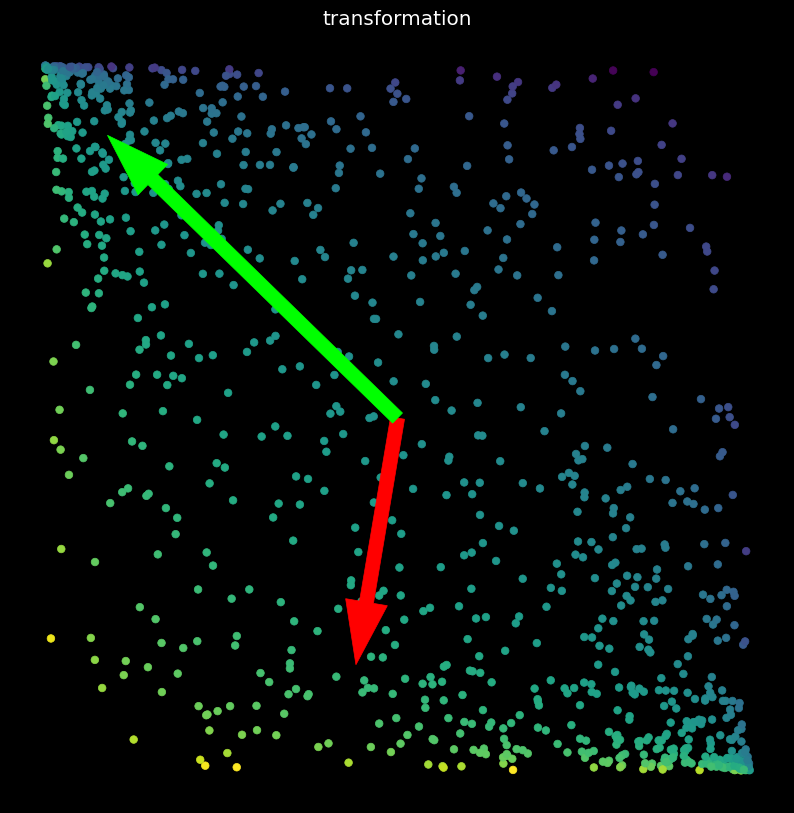

In [29]:
pl.show_scatterplot(Y.numpy(), colors, title='transformation')
pl.plot_bases(new_OI.numpy())